# Kanjonavo Sabud - SIF Quant Application EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import random
import seaborn as sns

from sklearn import preprocessing

import matplotlib.cm as cm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def relabel(df,cols):
  dcts = []
  for c in cols:
    le = preprocessing.LabelEncoder()
    le.fit(df[c])
    df[c] = le.transform(df[c])

    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(le_name_mapping)
    dcts.append(le_name_mapping)
  return dcts

#Data Exploration

First -- EDA on Features.csv



```
# This is formatted as code
```

##Features

In [ ]:
features = pd.read_csv('/content/drive/MyDrive/Club Apps 2024/Smith Quant Tryouts/data/features.csv')

In [ ]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [ ]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


For every feature, we created a **distribution histogram**.

Temperature and Fuel Price Distributions are uniform with little to no skew. They also contain no missing instances.

CPI and Unemployment on the other hand show some skew. Especially CPI which is bimodal.

MarkDowns have a heavy bias and also need to be scaled if used for forecasting.

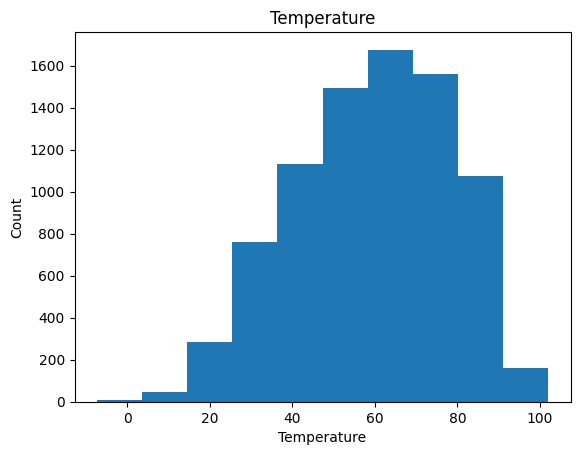

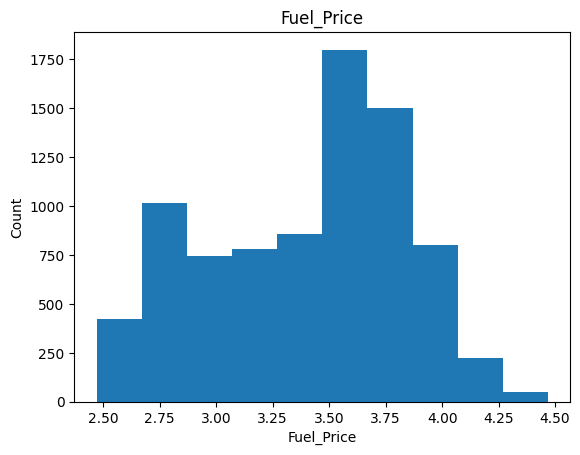

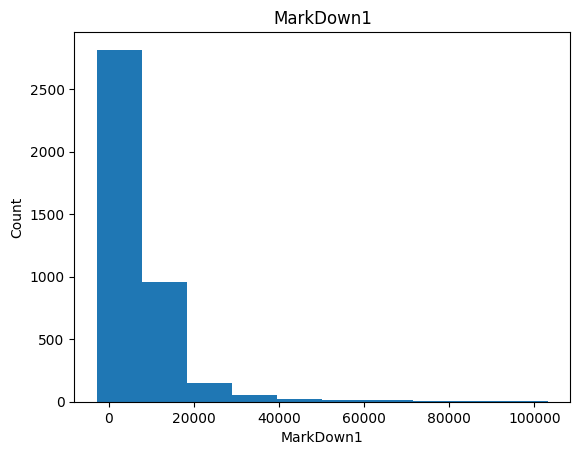

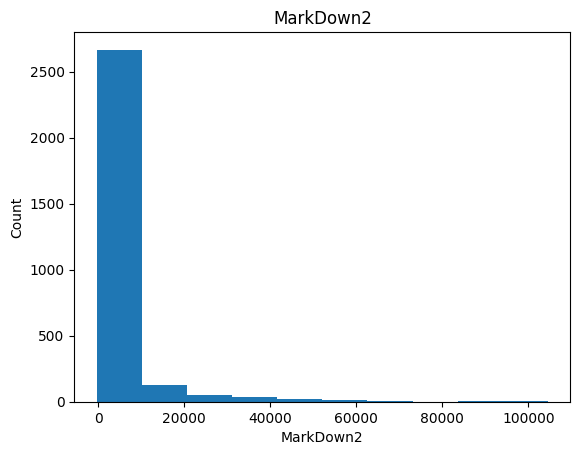

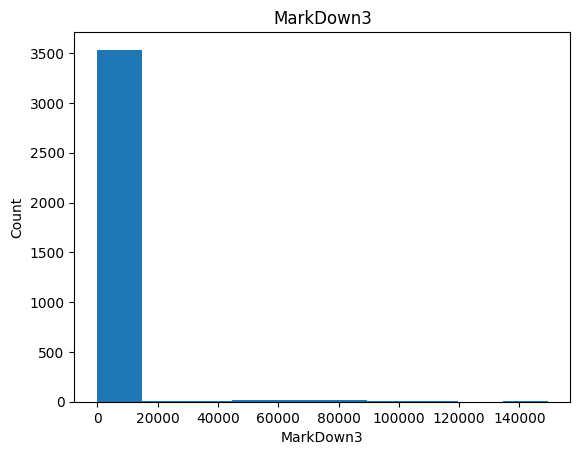

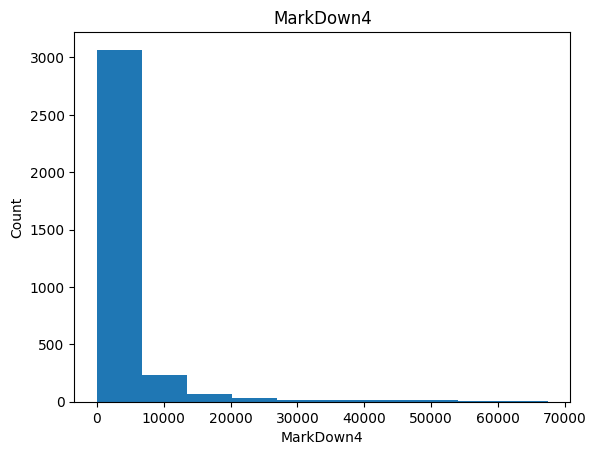

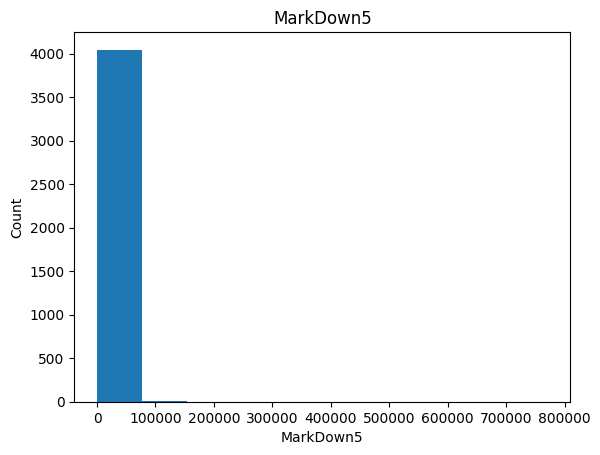

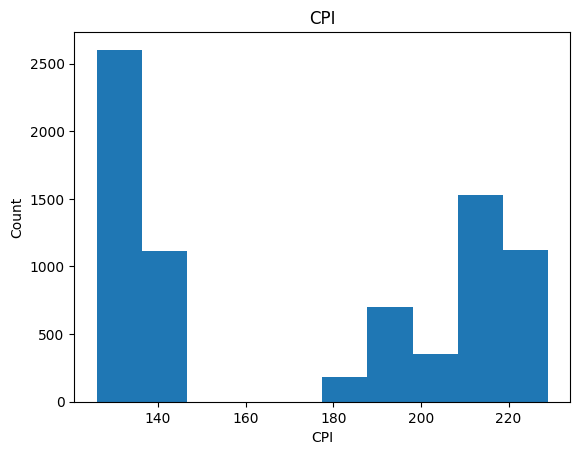

In [ ]:
for c in features.columns[2:-2]:
  plt.hist(features[c])
  plt.title(c)
  plt.xlabel(c)
  plt.ylabel("Count")
  plt.show()

Checking the **percentage of Missing data for each feature**.

MarkDowns have a huge percentage of their data missing.


1-50%; 2-62%, 3-55%, 4-57%, 5-49%

CPI and Unemployment have about 7% of their data missing.

We still have to check the timestamp of missing data.

Temperature has 0 missing data
Fuel_Price has 0 missing data
MarkDown1 has 4158 missing data
MarkDown2 has 5269 missing data
MarkDown3 has 4577 missing data
MarkDown4 has 4726 missing data
MarkDown5 has 4140 missing data
CPI has 585 missing data
Unemployment has 585 missing data
IsHoliday has 0 missing data


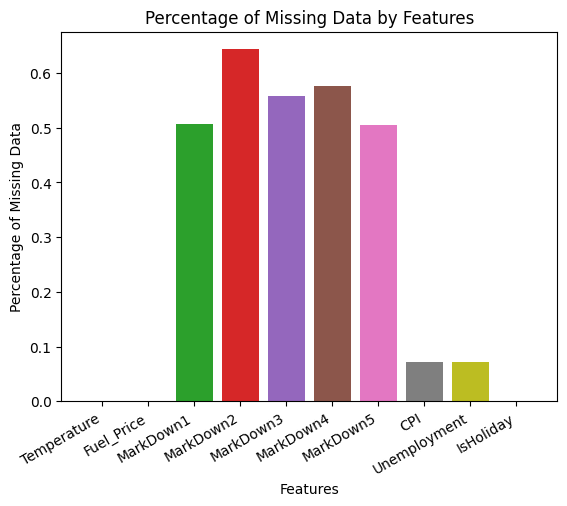

In [ ]:
for c in features.columns[2:]:
  missing = features[c].isna().sum()
  missing_percent = missing/len(features)
  plt.bar(c, missing_percent)
  print(f"{c} has {missing} missing data")

plt.title("Percentage of Missing Data by Features")
plt.xlabel("Features")
plt.xticks(rotation=30, ha='right')
plt.ylabel("Percentage of Missing Data")
plt.show()

In [ ]:
date_labeldct = relabel(features,["Date"])

{'2010-02-05': 0, '2010-02-12': 1, '2010-02-19': 2, '2010-02-26': 3, '2010-03-05': 4, '2010-03-12': 5, '2010-03-19': 6, '2010-03-26': 7, '2010-04-02': 8, '2010-04-09': 9, '2010-04-16': 10, '2010-04-23': 11, '2010-04-30': 12, '2010-05-07': 13, '2010-05-14': 14, '2010-05-21': 15, '2010-05-28': 16, '2010-06-04': 17, '2010-06-11': 18, '2010-06-18': 19, '2010-06-25': 20, '2010-07-02': 21, '2010-07-09': 22, '2010-07-16': 23, '2010-07-23': 24, '2010-07-30': 25, '2010-08-06': 26, '2010-08-13': 27, '2010-08-20': 28, '2010-08-27': 29, '2010-09-03': 30, '2010-09-10': 31, '2010-09-17': 32, '2010-09-24': 33, '2010-10-01': 34, '2010-10-08': 35, '2010-10-15': 36, '2010-10-22': 37, '2010-10-29': 38, '2010-11-05': 39, '2010-11-12': 40, '2010-11-19': 41, '2010-11-26': 42, '2010-12-03': 43, '2010-12-10': 44, '2010-12-17': 45, '2010-12-24': 46, '2010-12-31': 47, '2011-01-07': 48, '2011-01-14': 49, '2011-01-21': 50, '2011-01-28': 51, '2011-02-04': 52, '2011-02-11': 53, '2011-02-18': 54, '2011-02-25': 55, '

As shown, CPI and Unemployment have all their data for the first 169 weeks.

MarkDowns 1 - 5: have missing data through random weeks after no data till the first 92 weeks.

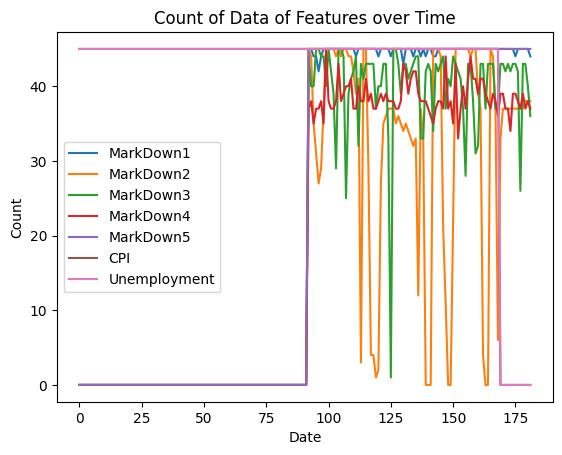

In [ ]:
MDCD = features[["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5", "CPI", "Unemployment"]].groupby(features["Date"]).count()
for c in MDCD.columns:
  plt.plot(MDCD[c])

plt.legend(["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5","CPI","Unemployment"])
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Count of Data of Features over Time")
plt.show()

## Train

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Club Apps 2024/Smith Quant Tryouts/data/train.csv')
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [ ]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


Some weekly sales are negative (min is -4988). So we project all negative values to 0.

In [ ]:
train["Weekly_Sales"] = train["Weekly_Sales"].apply(lambda x: 0 if x < 0 else x)

In [ ]:
dept_dct, date_dct, holiday_dct = relabel(train, ["Dept","Date","IsHoliday"])

{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 16: 14, 17: 15, 18: 16, 19: 17, 20: 18, 21: 19, 22: 20, 23: 21, 24: 22, 25: 23, 26: 24, 27: 25, 28: 26, 29: 27, 30: 28, 31: 29, 32: 30, 33: 31, 34: 32, 35: 33, 36: 34, 37: 35, 38: 36, 39: 37, 40: 38, 41: 39, 42: 40, 43: 41, 44: 42, 45: 43, 46: 44, 47: 45, 48: 46, 49: 47, 50: 48, 51: 49, 52: 50, 54: 51, 55: 52, 56: 53, 58: 54, 59: 55, 60: 56, 65: 57, 67: 58, 71: 59, 72: 60, 74: 61, 77: 62, 78: 63, 79: 64, 80: 65, 81: 66, 82: 67, 83: 68, 85: 69, 87: 70, 90: 71, 91: 72, 92: 73, 93: 74, 94: 75, 95: 76, 96: 77, 97: 78, 98: 79, 99: 80}
{'2010-02-05': 0, '2010-02-12': 1, '2010-02-19': 2, '2010-02-26': 3, '2010-03-05': 4, '2010-03-12': 5, '2010-03-19': 6, '2010-03-26': 7, '2010-04-02': 8, '2010-04-09': 9, '2010-04-16': 10, '2010-04-23': 11, '2010-04-30': 12, '2010-05-07': 13, '2010-05-14': 14, '2010-05-21': 15, '2010-05-28': 16, '2010-06-04': 17, '2010-06-11': 18, '2010-06-18': 19, '2010-06-25': 20, '

In [ ]:
def extractData(data,store,dept,start=0,end=142,showsSalesGraph=True):
  filter_data = data[data["Store"]==store][data["Dept"]==dept][data["Date"]>=start][data["Date"]<=end]
  if showsSalesGraph: sales_graph(filter_data,store,dept,start,end)
  return filter_data

def sales_graph(filter_data, store,dept,start,end):
  plt.plot(filter_data["Date"],filter_data["Weekly_Sales"])
  plt.xlabel("Date")
  plt.ylabel("Weekly Sales")
  plt.title(f"Weekly Sales for Department {dept} of Store {store} from timestamp {start} to {end}")
  plt.show()

Shows the Weekly_Sales data for random store and random department (can be changed) given a specified time frame.

2 47


<ipython-input-15-8b2ec450fe20>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filter_data = data[data["Store"]==store][data["Dept"]==dept][data["Date"]>=start][data["Date"]<=end]
<ipython-input-15-8b2ec450fe20>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filter_data = data[data["Store"]==store][data["Dept"]==dept][data["Date"]>=start][data["Date"]<=end]
<ipython-input-15-8b2ec450fe20>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filter_data = data[data["Store"]==store][data["Dept"]==dept][data["Date"]>=start][data["Date"]<=end]


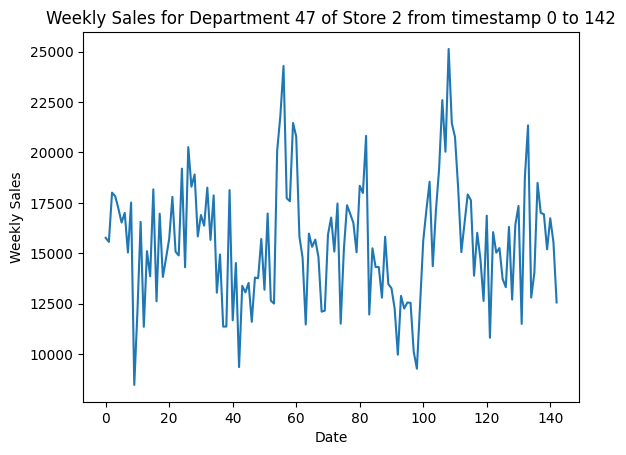

In [ ]:
#Example
store = random.randint(1,46)
dept = random.randint(0,81)

print(store,dept)
x=extractData(train,store,dept)

In [ ]:
def extractAllWeeklySales(data, batch_size=5, start=0, end=142):
    sales_data = {}

    for store_batch_start in range(1, 46, batch_size):
        store_batch_end = min(store_batch_start + batch_size, 46)
        for store in range(store_batch_start, store_batch_end):
            for dept in range(0, 81):
                filter_data = data[(data["Store"] == store) &
                                   (data["Dept"] == dept) &
                                   (data["Date"] >= start) &
                                   (data["Date"] <= end)]

                weekly_sales = filter_data['Weekly_Sales'].reset_index(drop=True)

                sales_data[(dept, store)] = weekly_sales

        print(f"Processed stores {store_batch_start} to {store_batch_end-1}")

    combined_data = pd.DataFrame(sales_data)

    return combined_data

Drops the Date sequence and provides the Weekly_Sale as a function of Store and Department numericals.

In [ ]:
allWeeklySales = extractAllWeeklySales(train, batch_size=10)
allWeeklySales

Processed stores 1 to 10
Processed stores 11 to 20
Processed stores 21 to 30
Processed stores 31 to 40
Processed stores 41 to 45


,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
,1,1,1,1,1,1,1,1,1,1,...,45,45,45,45,45,45,45,45,45,45
0,24924.50,50605.27,13740.12,39954.04,32229.38,5749.03,21084.08,40129.01,16930.99,30721.50,...,32016.42,22708.11,68203.08,4002.34,2.94,63833.63,3.00,8393.22,347.23,NaN
1,46039.49,44682.74,10887.84,35351.21,29620.81,9135.00,18310.31,37334.83,16562.49,31494.77,...,19724.40,13860.64,44898.91,2665.98,10.00,41131.42,2.94,5011.36,553.25,NaN
2,41595.55,47928.89,11523.47,36826.95,26468.27,6060.26,19985.20,38717.60,15880.85,29634.13,...,23280.08,16650.13,52417.82,2273.04,5.88,47214.80,NaN,5703.42,281.00,NaN
3,19403.54,44292.87,11135.17,34660.16,24101.89,5244.56,17224.22,35318.20,15175.52,27921.96,...,25421.33,17557.56,53780.81,2188.80,8.82,49982.50,NaN,6343.60,2.50,NaN
4,21827.90,48397.98,12275.58,38086.19,23082.14,4221.25,19659.70,38776.09,24064.70,33299.27,...,22653.30,16332.01,49663.66,2188.18,3.98,48006.18,NaN,5445.80,4.50,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,18947.81,45784.76,13085.95,34647.33,22560.39,3168.68,22343.24,37254.84,40712.85,27205.40,...,22566.07,15020.88,47372.08,2763.02,NaN,49380.11,NaN,6269.73,NaN,NaN
139,21904.47,48577.08,11676.98,39311.93,25508.81,3843.29,22071.39,42663.75,40439.53,27822.40,...,23363.79,16221.11,50301.74,2807.14,NaN,50241.01,NaN,6573.18,NaN,NaN
140,22764.01,42112.67,10487.17,35446.18,20920.03,3788.59,20212.71,37248.47,37126.23,27803.78,...,23653.95,17566.28,52360.65,2644.24,NaN,49334.77,NaN,6463.32,NaN,NaN


In [ ]:
def calculateMetrics(sales_df):
    metrics = {}
    for column in sales_df.columns:

        column_data = sales_df[column]
        metrics[column] = {
            'count': 143 - column_data.isna().sum(),
            'mean': column_data.mean(),
            'std': column_data.std(),
            'min': column_data.min(),
            'max': column_data.max(),
            'sum': column_data.sum()
        }

    metrics_df = pd.DataFrame(metrics).T

    return metrics_df

Calculates the count (not NA), mean, standard deviation, min, max and sum of each Weekly_Sale time series for each pair of Store and Department.

Presented as an extendable table format.

In [ ]:
cM = calculateMetrics(allWeeklySales)
cM

,,count,mean,std,min,max,sum
0,1,143.0,22513.322937,9854.349032,14537.37,57592.12,3219405.18
1,1,143.0,46102.090420,3440.673222,35819.83,65615.36,6592598.93
2,1,143.0,13150.478042,8708.978853,6165.73,51159.17,1880518.36
3,1,143.0,36964.154476,2930.698313,32497.43,47893.23,5285874.09
4,1,143.0,24257.941119,11330.286495,11570.27,85676.09,3468885.58
...,...,...,...,...,...,...,...
76,45,143.0,52896.166643,5117.961708,41131.42,75204.77,7564151.83
77,45,2.0,2.970000,0.042426,2.94,3.00,5.94
78,45,143.0,6466.961888,659.739542,4935.60,8765.09,924775.55
79,45,135.0,561.239037,371.286705,2.00,1504.71,75767.27


Transposes the all_weekly_sales matrix and gets the Weekly_Sales timeseries in different columns rather than rows.

total_sales: sums up the Weekly_Sales for each pair of Store and Department.

In [ ]:
AT = allWeeklySales.T
AT.rename_axis(["Dept","Store"], inplace=True)
total_sales_by_store_dept_pair = AT.sum(axis=1)
total_sales = total_sales_by_store_dept_pair.reset_index()
total_sales

,Dept,Store,0
0,0,1,3219405.18
1,1,1,6592598.93
2,2,1,1880518.36
3,3,1,5285874.09
4,4,1,3468885.58
...,...,...,...
3640,76,45,7564151.83
3641,77,45,5.94
3642,78,45,924775.55
3643,79,45,75767.27


### Bar Graphs for Dept and Store

In [ ]:
def plot_by_dept(data, n=3):

    fig, ax = plt.subplots(figsize=(12, 8))

    top_n_stores_per_dept = {}
    unique_stores = set()

    cmap = cm.get_cmap('tab20', 45)
    store_colors = {store: cmap(i) for i, store in enumerate(range(1, 46))}

    for dept in range(0, 81):

        dept_sales = data[data['Dept'] == dept]
        top_n_stores = dept_sales.nlargest(n, 0)

        top_n_stores_per_dept[dept] = top_n_stores
        unique_stores.update(top_n_stores['Store'].unique())


        bottom = 0
        for _, row in top_n_stores.iterrows():
            store = row['Store']
            sales = row[0]
            color = store_colors[store]
            ax.bar(dept, sales, bottom=bottom, label=f'Store {int(store)}' if store in unique_stores else "", color=color)
            bottom += sales

    handles, labels = ax.get_legend_handles_labels()
    unique_labels, unique_handles = [], []
    for handle, label in zip(handles, labels):
        if label not in unique_labels:
            unique_labels.append(label)
            unique_handles.append(handle)

    ax.set_xlabel('Department')
    ax.set_ylabel('Total Sales')
    ax.set_title(f'Top {n} Store Contributors per Department')

    ax.legend(unique_handles, unique_labels, title='Stores', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    return top_n_stores_per_dept


It can be seen that Department 2, 38, 40, 72, 90, 92, and 95 accumulate a significant amount of sales.

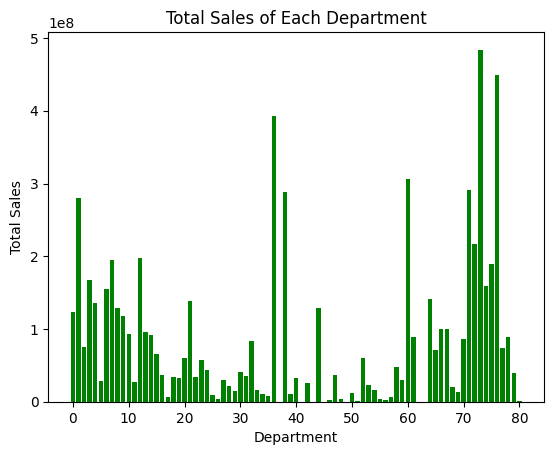

In [ ]:
for dept in range(0,81):
  total_store_sale = total_sales[total_sales["Dept"] == dept]
  total_dept_sale = total_store_sale.sum()
  plt.bar(dept,total_dept_sale, color='green')

plt.title("Total Sales of Each Department")
plt.xlabel("Department")
plt.ylabel("Total Sales")
plt.show()

Similar to the above graph which showed the total sales for each Department, the below graph further shows the contribution of the top N Stores for each Department.

In addition to the stacked bar graph, a table is also provided.

It can be seen that even while only considering top 3 for each department, there is still a wide range of stores. Big contributors include: 1, 2, 10, 11 and 20.



<ipython-input-22-72d1c0cd8466>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', 45)


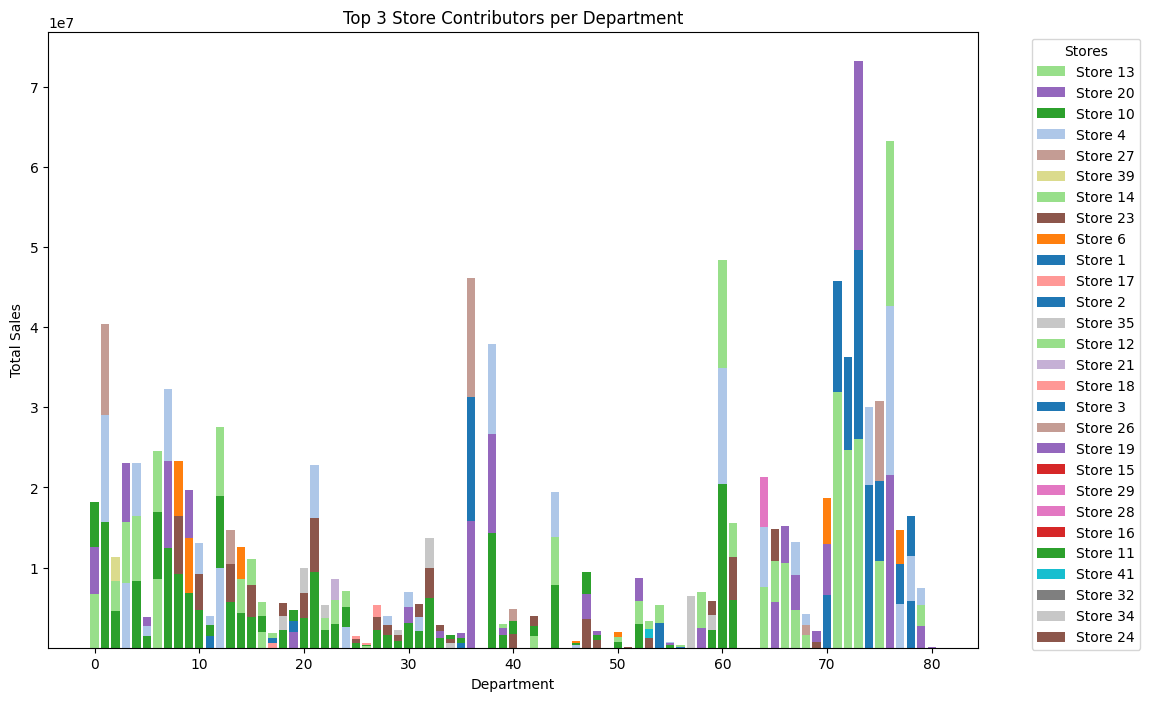

In [ ]:
top_n_stores_per_dept = plot_by_dept(total_sales, n=3)

In [ ]:
top_n_stores_per_dept

{0:       Dept  Store           0
 972      0     13  6723925.13
 1539     0     20  5798002.67
 729      0     10  5709294.87,
 1:       Dept  Store            0
 730      1     10  15700726.68
 244      1      4  13390422.10
 2107     1     27  11297150.03,
 2:       Dept  Store           0
 731      2     10  4588323.95
 974      2     13  3734677.19
 3080     2     39  2941467.33,
 3:       Dept  Store           0
 246      3      4  8094286.22
 1056     3     14  7569894.23
 1542     3     20  7358261.86,
 4:      Dept  Store           0
 733     4     10  8347404.82
 976     4     13  8120531.67
 247     4      4  6530582.17,
 5:       Dept  Store           0
 734      5     10  1509586.76
 248      5      4  1178574.21
 1544     5     20  1174136.64,
 6:       Dept  Store           0
 978      6     13  8565233.62
 735      6     10  8431954.34
 1059     6     14  7615629.49,
 7:       Dept  Store            0
 736      7     10  12403798.07
 1546     7     20  10931643.76
 250 

In [ ]:
def plot_by_store(data, n=5):

    fig, ax = plt.subplots(figsize=(12, 8))

    top_n_depts_per_store = {}
    unique_depts = set()

    cmap = cm.get_cmap('tab20', 81)
    dept_colors = {dept: cmap(i % cmap.N) for i, dept in enumerate(range(81))}

    for store in range(1,46):

        store_sales = data[data['Store'] == store]
        top_n_depts = store_sales.nlargest(n, 0)

        top_n_depts_per_store[store] = top_n_depts
        unique_depts.update(top_n_depts['Dept'].unique())


        bottom = 0
        for _, row in top_n_depts.iterrows():
            dept = row['Dept']
            sales = row[0]
            color = dept_colors[dept]
            ax.bar(store, sales, bottom=bottom, label=f'Dept {int(dept)}' if store in unique_depts else "", color=color)
            bottom += sales

    handles, labels = ax.get_legend_handles_labels()
    unique_labels, unique_handles = [], []
    for handle, label in zip(handles, labels):
        if label not in unique_labels:
            unique_labels.append(label)
            unique_handles.append(handle)

    ax.set_xlabel('Stores')
    ax.set_ylabel('Total Sales')
    ax.set_title(f'Top {n} Department Contributors per Store')

    ax.legend(unique_handles, unique_labels, title='Departments', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    return top_n_depts_per_store

It can be seen that Stores 2, 4, 10, 13, 14, 20, and 27 accumulate a lot of sales.

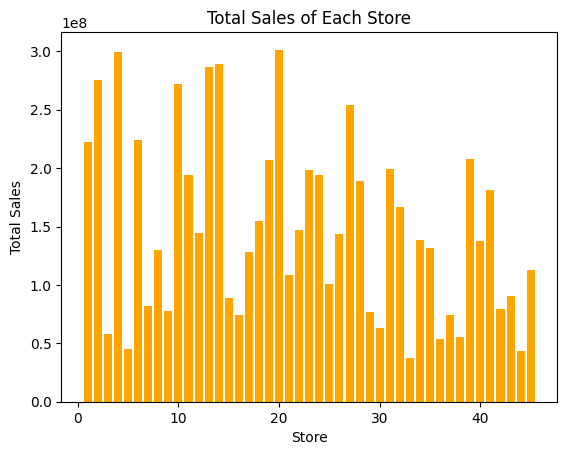

In [ ]:
for store in range(1, 46):
  total_dept_sale = total_sales[total_sales["Store"] == store]
  total_store_sale = total_dept_sale.sum()
  plt.bar(store,total_store_sale, color="orange")

plt.title("Total Sales of Each Store")
plt.xlabel("Store")
plt.ylabel("Total Sales")
plt.show()

Similar to the above graph which showed the total sales for each Store, the below graph further shows the contribution of the top N Departments for each Store.

In addition to the stacked bar graph, a table is also provided.

Top Departments include 2, 60, 91, 93, and 94.

<ipython-input-25-0a9c169b90f7>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', 81)


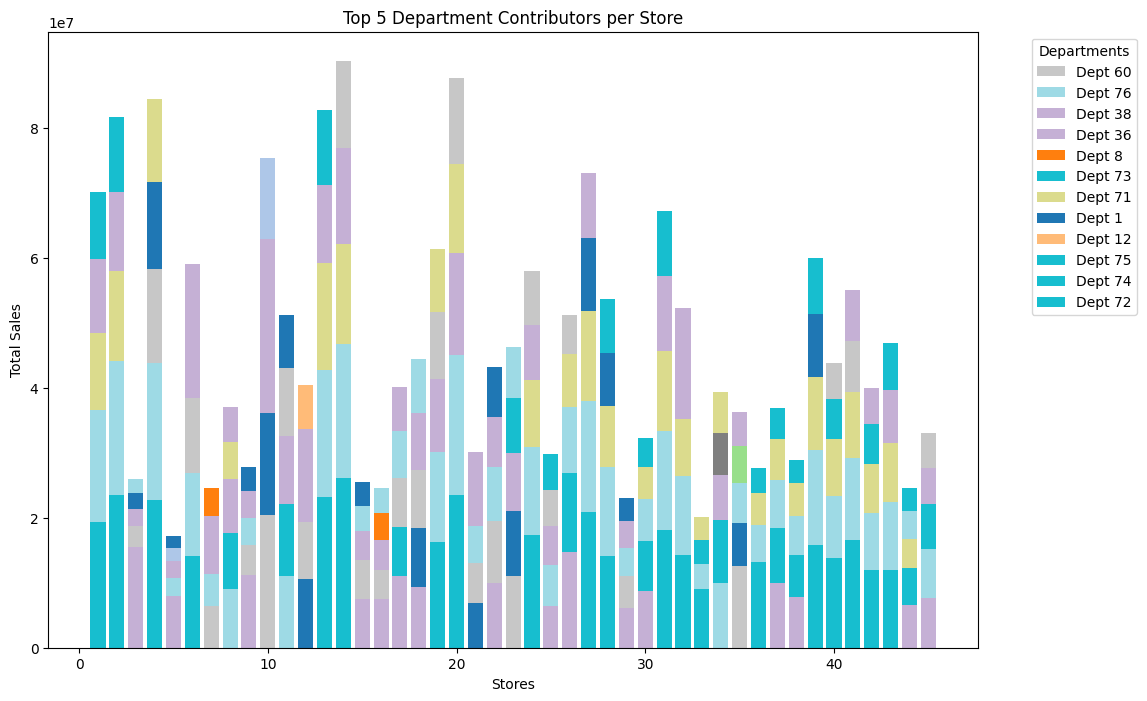

In [ ]:
top_n_depts_per_store = plot_by_store(total_sales, 5)

In [ ]:
top_n_depts_per_store

{1:     Dept  Store            0
 73    73      1  19370632.64
 76    76      1  17270404.89
 71    71      1  11787139.34
 36    36      1  11436885.83
 74    74      1  10252983.08,
 2:      Dept  Store            0
 154    73      2  23572153.03
 157    76      2  20533191.52
 152    71      2  13958449.81
 117    36      2  12171444.43
 153    72      2  11527284.39,
 3:      Dept  Store            0
 198    36      3  15529566.07
 222    60      3   3259950.49
 200    38      3   2603044.48
 163     1      3   2408373.92
 238    76      3   2251610.54,
 4:      Dept  Store            0
 316    73      4  22789210.43
 319    76      4  21054815.74
 303    60      4  14477956.47
 244     1      4  13390422.10
 314    71      4  12762602.07,
 5:      Dept  Store           0
 360    36      5  7893570.24
 400    76      5  2765719.24
 362    38      5  2764046.28
 331     7      5  1964206.45
 325     1      5  1761467.32,
 6:      Dept  Store            0
 478    73      6  14160545.

### Analysis over Time

In [ ]:
date_labeldct

[{'2010-02-05': 0,
  '2010-02-12': 1,
  '2010-02-19': 2,
  '2010-02-26': 3,
  '2010-03-05': 4,
  '2010-03-12': 5,
  '2010-03-19': 6,
  '2010-03-26': 7,
  '2010-04-02': 8,
  '2010-04-09': 9,
  '2010-04-16': 10,
  '2010-04-23': 11,
  '2010-04-30': 12,
  '2010-05-07': 13,
  '2010-05-14': 14,
  '2010-05-21': 15,
  '2010-05-28': 16,
  '2010-06-04': 17,
  '2010-06-11': 18,
  '2010-06-18': 19,
  '2010-06-25': 20,
  '2010-07-02': 21,
  '2010-07-09': 22,
  '2010-07-16': 23,
  '2010-07-23': 24,
  '2010-07-30': 25,
  '2010-08-06': 26,
  '2010-08-13': 27,
  '2010-08-20': 28,
  '2010-08-27': 29,
  '2010-09-03': 30,
  '2010-09-10': 31,
  '2010-09-17': 32,
  '2010-09-24': 33,
  '2010-10-01': 34,
  '2010-10-08': 35,
  '2010-10-15': 36,
  '2010-10-22': 37,
  '2010-10-29': 38,
  '2010-11-05': 39,
  '2010-11-12': 40,
  '2010-11-19': 41,
  '2010-11-26': 42,
  '2010-12-03': 43,
  '2010-12-10': 44,
  '2010-12-17': 45,
  '2010-12-24': 46,
  '2010-12-31': 47,
  '2011-01-07': 48,
  '2011-01-14': 49,
  '2011-01

Needed to check which numericals for the Date column divide the sequence into the respective years.

0-47 2010

48-100 2011

101-142 2012

143-152 2012 (test)

153-181 2013

This graph shows the total weekly sales accross all departments and stores over time in a yearly interval. As it can be seen, there is a significant increase during thanksgving, christmas and new years. There is, however, a sharp drop right after those periods.

Overall, the departments and stores accumulate a weekly total of about 47,500,000 dollars.

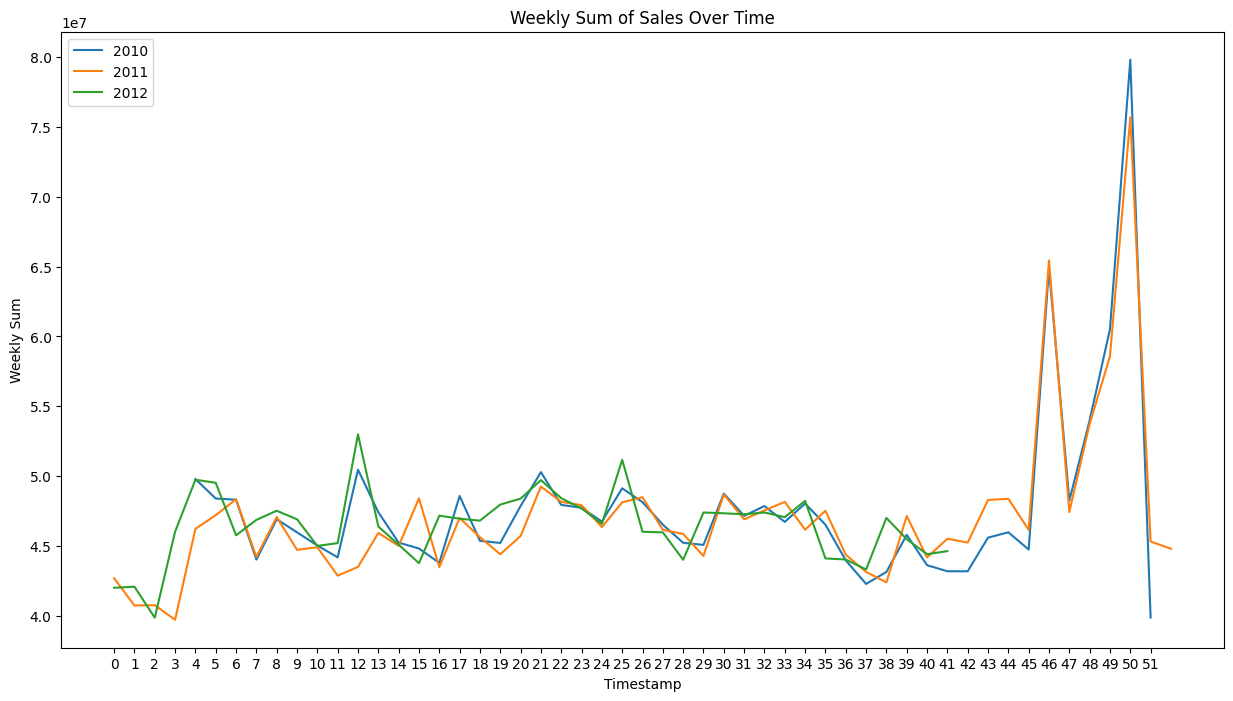

In [ ]:
weekly_sum = [AT[c].sum() for c in AT.columns]

plt.figure(figsize=(15,8))
plt.plot([i for i in range(4,52)],weekly_sum[0:48])
plt.plot(weekly_sum[48:101])
plt.plot(weekly_sum[101:143])
plt.legend(["2010","2011","2012"])

plt.xticks(np.arange(0, 52, 1))
plt.xlabel("Timestamp")
plt.ylabel("Weekly Sum")
plt.title("Weekly Sum of Sales Over Time")
plt.show()

As it was seen by the above graph, there is a sharp increase in sales during the winter preceeding new years. To further examine this phenomenon, we explore how holiday affects sales.

It turns out that even though there are only a sum total of 29661 individual weeks (each week is considered unique for each pair of department and store for this purpose) compared to 391,909 non-holiday weeks, those weeks accumulate a total of 505307535 dollars compared to 623199613 dollars of non-holiday weeks.

This shows that sales (as they should) increase significantly during holiday season.

In [ ]:
holiday = train[train["IsHoliday"]==1]
not_holiday = train[train["IsHoliday"]==0]

hsum = holiday["Weekly_Sales"].sum()
nsum = not_holiday["Weekly_Sales"].sum()
print(f"Holiday weeks accumulate {hsum} dollars in a total of {len(holiday)} weeks")
print(f"Non holiday weeks accumulate {nsum} dollars in a total of {len(not_holiday)} weeks")

Holiday weeks accumulate 505307535.15 dollars in a total of 29661 weeks
Non holiday weeks accumulate 6231999613.520001 dollars in a total of 391909 weeks


In [ ]:
print("Holiday")
print(holiday["Weekly_Sales"].describe())
print()
print("Not Holiday")
print(not_holiday["Weekly_Sales"].describe())

Holiday
count     29661.000000
mean      17036.092349
std       27221.830002
min           0.000000
25%        2078.540000
50%        7947.740000
75%       21189.250000
max      693099.360000
Name: Weekly_Sales, dtype: float64

Not Holiday
count    391909.000000
mean      15901.649652
std       22330.597664
min           0.000000
25%        2079.750000
50%        7589.950000
75%       20131.210000
max      406988.630000
Name: Weekly_Sales, dtype: float64


## Merging Train and Feature

In [ ]:
merged_train = pd.merge(train, features, how='left', on=['Store','Date'])
merged_train.rename(columns={"IsHoliday_x":"IsHoliday"}, inplace=True)
merged_train = merged_train.drop(columns=["IsHoliday_y"])
merged_train

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,0,0,24924.50,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,0,1,46039.49,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,0,2,41595.55,0,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,0,3,19403.54,0,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,0,4,21827.90,0,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,79,138,508.37,0,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,79,139,628.10,0,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
421567,45,79,140,1061.02,0,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
421568,45,79,141,760.01,0,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


Explored the relation between temperature, Fuel price, CPI, and Unemployment on Weekly Sales.

Temperature-- Extreme temperature leads to decrease sales. This makes sense as too cold or too hot environment would make people less likely to travel outside.

Fuel price-- No significant relation between fuel price and weekly sales

Unemployment-- high unemployments leads to decrease sales. High unemployment signifies less 'pocket money' which means less sales.

CPI-- No significant relation between CPI and weekly sales.


I also explored the distribution with specific stores and departments as well as holiday vs not-holiday.

No significant difference between specific stores and departments but we did find that during holiday season, there were high weekly sales overall.

In [ ]:
s, d, h = random.randint(1,46), random.randint(0,81), random.randint(0,1)

temp = merged_train
# temp = merged_train[merged_train["Store"]==s]
# temp = merged_train[merged_train["Dept"]==d]
# temp = merged_train[merged_train["IsHoliday"]==h]

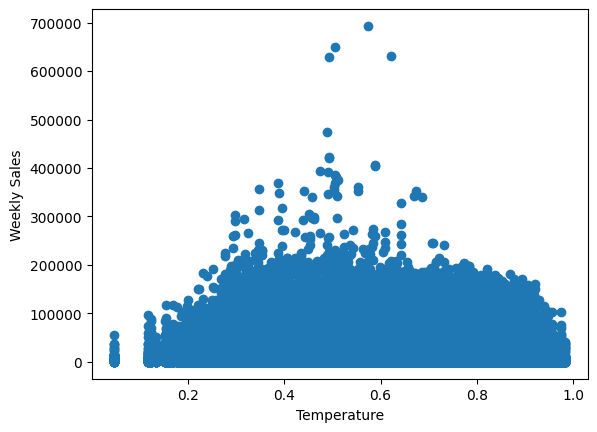

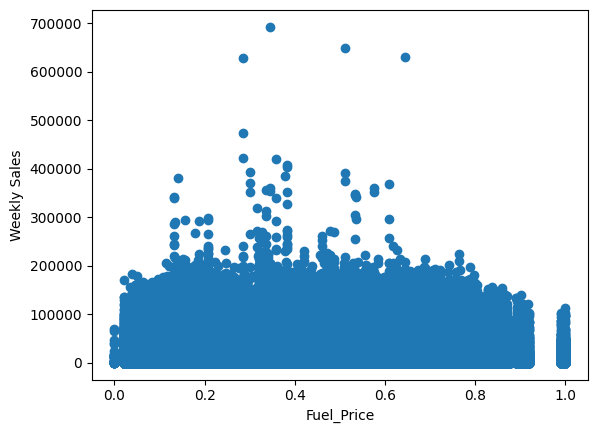

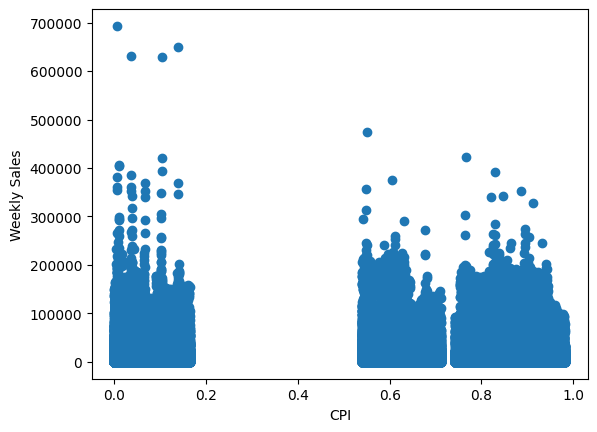

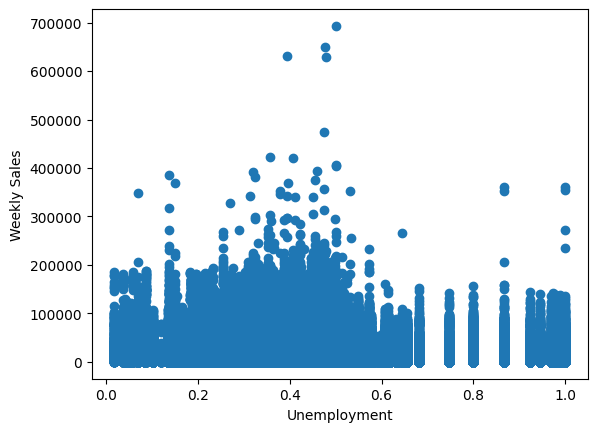

In [ ]:
for c in ["Temperature", "Fuel_Price", "CPI", "Unemployment"]:
  plt.scatter(temp[c],temp["Weekly_Sales"])
  plt.xlabel(c)
  plt.ylabel("Weekly Sales")
  plt.show()

Pearson Correlation matrix for all features.

--MarkDowns have low correlation between weekly sales.

--There is a suprisingly high correlation between Fuel Price and Weekly Sales (.77), CPI and Unemployment (-.3), Unemployment and Date (-.24), and CPI and Store (-.21)

--There is also a medium correlation between Unemployment and Sales (.22)

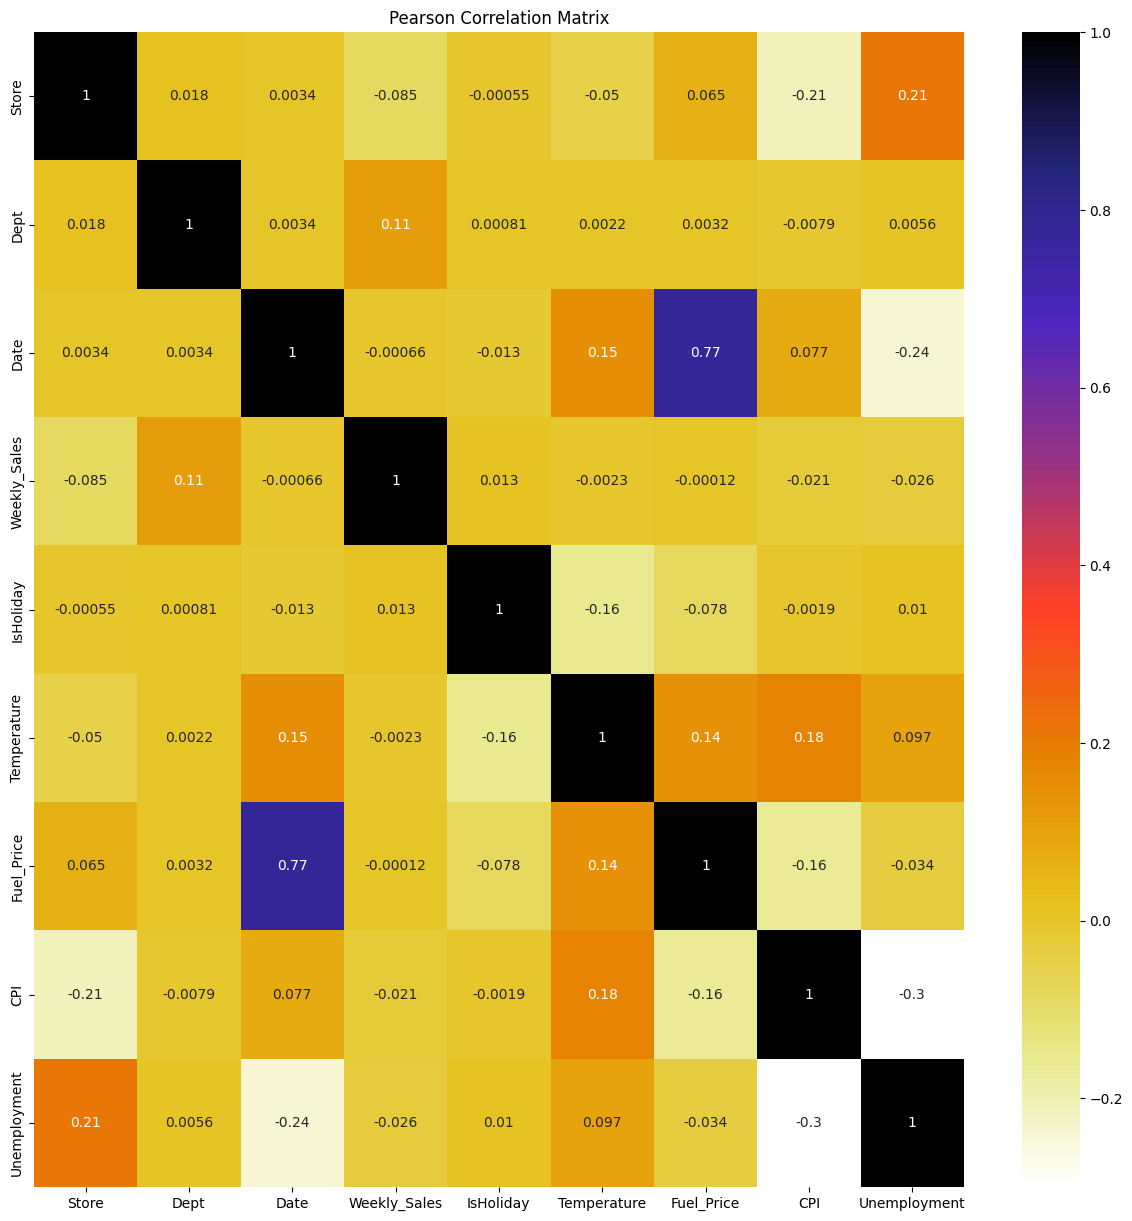

In [ ]:
cor = temp.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.title("Pearson Correlation Matrix")
plt.show()



```
# This is formatted as code
```

# Forecasting

Pre-Processing Part 1: Data Normalization -- Min Max Scaling

Min_Maxed Normalization on Temperature, Fuel Price, CPI and Unemployment -- projected down to 0-1.

In [ ]:
df_min_max_scaled = features
chosen_column_names = ['Temperature', 'Fuel_Price','CPI','Unemployment']

for column in df_min_max_scaled.columns:
	if column in chosen_column_names:
	  df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())

In [ ]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,0,0.454046,0.050100,NaN,NaN,NaN,NaN,NaN,0.826259,0.416032,False
1,1,1,0.419260,0.038076,NaN,NaN,NaN,NaN,NaN,0.827676,0.416032,True
2,1,2,0.432259,0.021042,NaN,NaN,NaN,NaN,NaN,0.828132,0.416032,False
3,1,3,0.493592,0.044589,NaN,NaN,NaN,NaN,NaN,0.828429,0.416032,False
4,1,4,0.492402,0.076653,NaN,NaN,NaN,NaN,NaN,0.828725,0.416032,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,177,0.762907,0.584669,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,178,0.776181,0.572144,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,179,0.793299,0.572144,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,180,0.825064,0.633768,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [ ]:
merged_train = pd.merge(train, features, how='left', on=['Store','Date'])
merged_train.rename(columns={"IsHoliday_x":"IsHoliday"}, inplace=True)
merged_train = merged_train.drop(columns=["IsHoliday_y"])
merged_train

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,0,0,24924.50,0,0.454046,0.050100,NaN,NaN,NaN,NaN,NaN,0.826259,0.416032
1,1,0,1,46039.49,1,0.419260,0.038076,NaN,NaN,NaN,NaN,NaN,0.827676,0.416032
2,1,0,2,41595.55,0,0.432259,0.021042,NaN,NaN,NaN,NaN,NaN,0.828132,0.416032
3,1,0,3,19403.54,0,0.493592,0.044589,NaN,NaN,NaN,NaN,NaN,0.828429,0.416032
4,1,0,4,21827.90,0,0.492402,0.076653,NaN,NaN,NaN,NaN,NaN,0.828725,0.416032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,79,138,508.37,0,0.660655,0.764028,4556.61,20.64,1.50,1601.01,3288.25,0.640832,0.470411
421566,45,79,139,628.10,0,0.660747,0.758016,5046.74,NaN,18.82,2253.43,2340.01,0.642356,0.468812
421567,45,79,140,1061.02,0,0.565361,0.765531,1956.28,NaN,7.89,599.32,3990.54,0.643880,0.468812
421568,45,79,141,760.01,0,0.583669,0.750000,2004.02,NaN,3.18,437.73,1537.49,0.643915,0.468812


In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Club Apps 2024/Smith Quant Tryouts/data/test.csv')
test

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [ ]:
dept, date, holiday = relabel(test, ["Dept","Date","IsHoliday"])

{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 16: 14, 17: 15, 18: 16, 19: 17, 20: 18, 21: 19, 22: 20, 23: 21, 24: 22, 25: 23, 26: 24, 27: 25, 28: 26, 29: 27, 30: 28, 31: 29, 32: 30, 33: 31, 34: 32, 35: 33, 36: 34, 37: 35, 38: 36, 39: 37, 40: 38, 41: 39, 42: 40, 43: 41, 44: 42, 45: 43, 46: 44, 47: 45, 48: 46, 49: 47, 50: 48, 51: 49, 52: 50, 54: 51, 55: 52, 56: 53, 58: 54, 59: 55, 60: 56, 65: 57, 67: 58, 71: 59, 72: 60, 74: 61, 77: 62, 78: 63, 79: 64, 80: 65, 81: 66, 82: 67, 83: 68, 85: 69, 87: 70, 90: 71, 91: 72, 92: 73, 93: 74, 94: 75, 95: 76, 96: 77, 97: 78, 98: 79, 99: 80}
{'2012-11-02': 0, '2012-11-09': 1, '2012-11-16': 2, '2012-11-23': 3, '2012-11-30': 4, '2012-12-07': 5, '2012-12-14': 6, '2012-12-21': 7, '2012-12-28': 8, '2013-01-04': 9, '2013-01-11': 10, '2013-01-18': 11, '2013-01-25': 12, '2013-02-01': 13, '2013-02-08': 14, '2013-02-15': 15, '2013-02-22': 16, '2013-03-01': 17, '2013-03-08': 18, '2013-03-15': 19, '2013-03-22': 20, '

Merged Test Dataset's Date Feature is tranformed to x+143 which puts it after the training dataset's relabeled values.

In [ ]:
test["Date"] = test["Date"].apply(lambda x: x+143)

In [ ]:
merged_test = pd.merge(test, features[143:], how='left', on=['Store','Date'])
merged_test.rename(columns={"IsHoliday_x":"IsHoliday"}, inplace=True)
merged_test = merged_test.drop(columns=["IsHoliday_y"])
merged_test

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,0,143,0,0.573142,0.457916,6766.44,5147.70,50.82,3639.90,2737.42,0.946424,0.271804
1,1,0,144,0,0.627334,0.421844,11421.32,3370.89,40.28,4646.79,6154.16,0.946604,0.271804
2,1,0,145,0,0.551172,0.390782,9696.28,292.10,103.78,1133.15,6612.69,0.946911,0.271804
3,1,0,146,1,0.581472,0.370240,883.59,4.17,74910.32,209.91,303.32,0.947387,0.271804
4,1,0,147,0,0.545862,0.368236,2460.03,NaN,3838.35,150.57,6966.34,0.947864,0.271804
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,79,177,0,0.762907,0.584669,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN
115060,45,79,178,0,0.776181,0.572144,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN
115061,45,79,179,0,0.793299,0.572144,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN
115062,45,79,180,0,0.825064,0.633768,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN


Pre-Processing Part 2: Feature Selection

*Same* Correlation matrix as before. Except:

--MarkDowns have high correlation with IsHoliday. This makes sense as promotional markdowns are implemented during holidays.

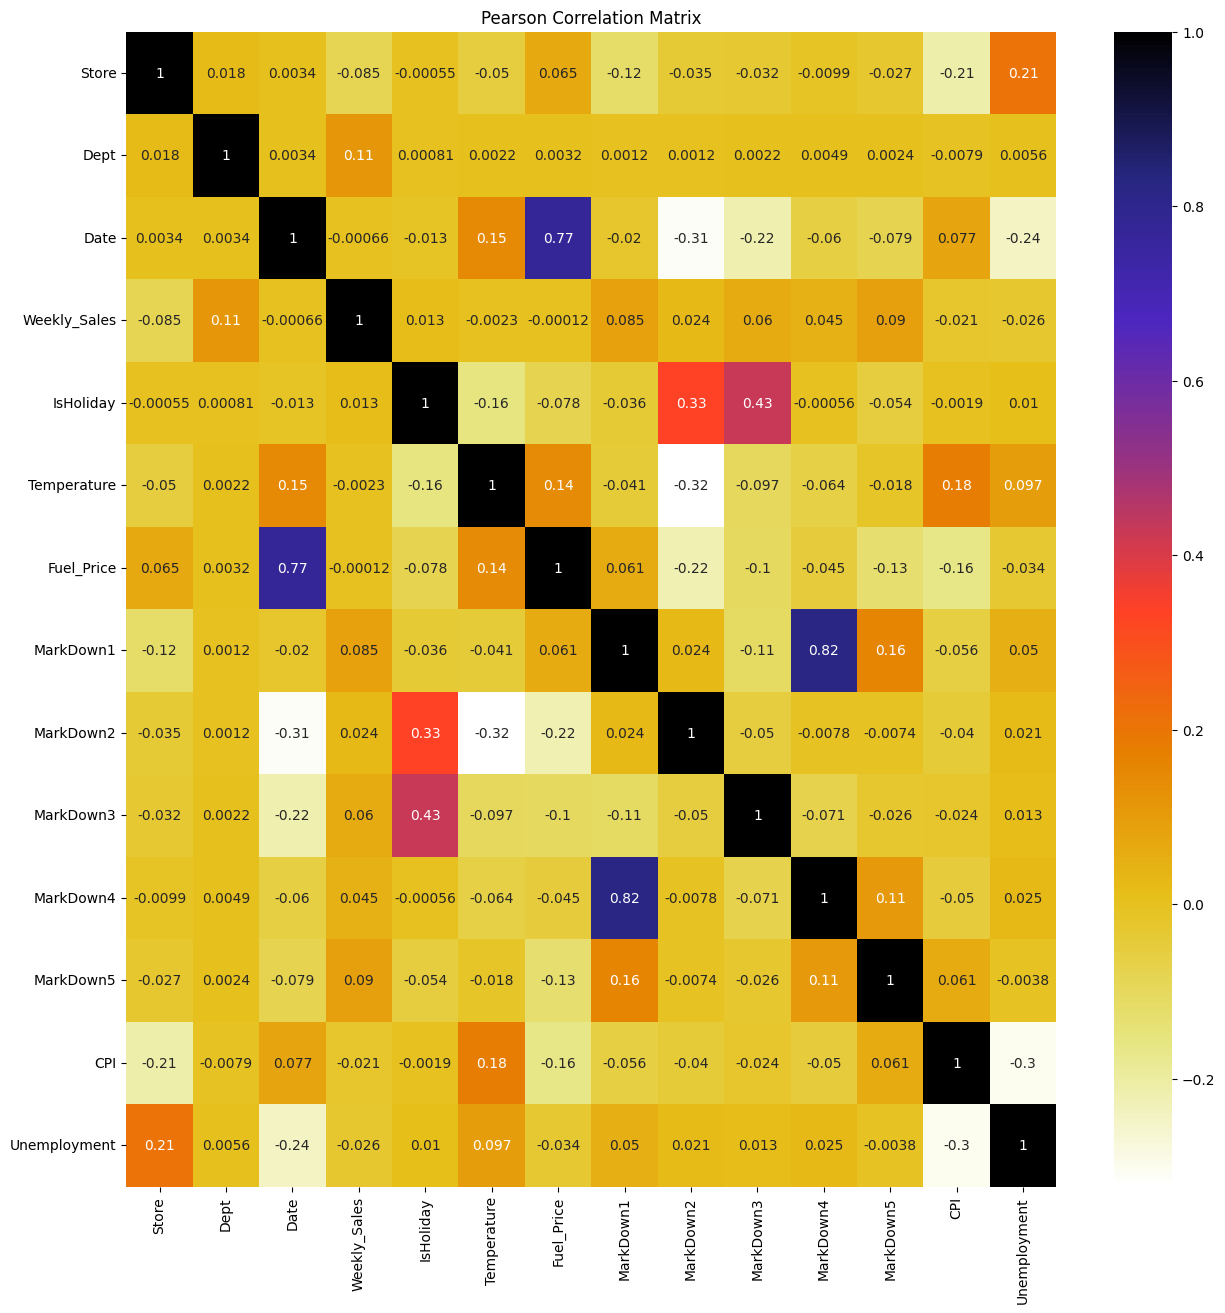

In [ ]:
cor = merged_train.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.title("Pearson Correlation Matrix")
plt.show()

All MarkDowns dropped because of missing data values and low correlation between them and weekly sales

In [ ]:
merged_test.drop(columns=["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"], inplace=True)
merged_train.drop(columns=["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"], inplace=True)

In [ ]:
X_train = merged_train.drop(columns=["Weekly_Sales"])
y_train = merged_train["Weekly_Sales"]

X_test = merged_test

In [ ]:
X_test

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment
0,1,0,143,0,0.573142,0.457916,0.946424,0.271804
1,1,0,144,0,0.627334,0.421844,0.946604,0.271804
2,1,0,145,0,0.551172,0.390782,0.946911,0.271804
3,1,0,146,1,0.581472,0.370240,0.947387,0.271804
4,1,0,147,0,0.545862,0.368236,0.947864,0.271804
...,...,...,...,...,...,...,...,...
115059,45,79,177,0,0.762907,0.584669,NaN,NaN
115060,45,79,178,0,0.776181,0.572144,NaN,NaN
115061,45,79,179,0,0.793299,0.572144,NaN,NaN
115062,45,79,180,0,0.825064,0.633768,NaN,NaN


### CPI and Unemployment Value Fillers

CPI and Unemployment are now the only features with missing values.

Missing values start from 169th week.

Regressor model will not admit NA values. So, we decided to forecast CPI and Unemployment and substitute our predictions for missing values.

We used a simple Linear Regression Model.

The first part of this section is pure exploration. We were working on the assumption that CPI and Unemployment from week 143 to 168 would be same for all stores and departments. This turned out to be false. It was same for all departments but different for individual stores.

We decided to keep the first section due to visual graphs and work experience.

<ipython-input-47-370eb2dff02f>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  CPI = X_test[X_test["Store"]==store][X_test["Dept"]==dept][X_test["Date"]<169]["CPI"].to_numpy()
<ipython-input-47-370eb2dff02f>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  CPI = X_test[X_test["Store"]==store][X_test["Dept"]==dept][X_test["Date"]<169]["CPI"].to_numpy()
<ipython-input-47-370eb2dff02f>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Unemployment = X_test[X_test["Store"]==store][X_test["Dept"]==dept][X_test["Date"]<169]["Unemployment"].to_numpy()
<ipython-input-47-370eb2dff02f>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Unemployment = X_test[X_test["Store"]==store][X_test["Dept"]==dept][X_test["Date"]<169]["Unemployment"].to_numpy()


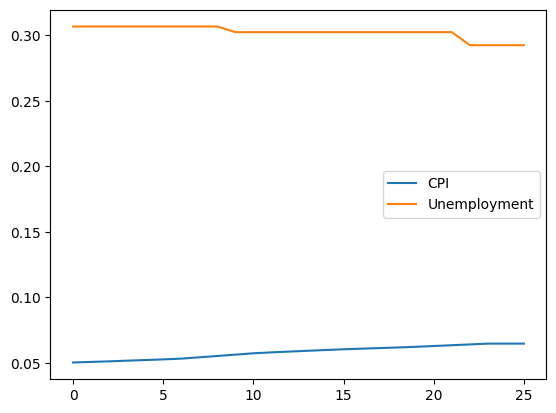

In [ ]:
store = 42
dept = random.randint(0,81)

CPI = X_test[X_test["Store"]==store][X_test["Dept"]==dept][X_test["Date"]<169]["CPI"].to_numpy()
Unemployment = X_test[X_test["Store"]==store][X_test["Dept"]==dept][X_test["Date"]<169]["Unemployment"].to_numpy()

plt.plot(CPI)
plt.plot(Unemployment)
plt.legend(["CPI","Unemployment"])
plt.show()

In [ ]:
x_train = [[i] for i in range(143,169)]
x_pred = [[i] for i in range(169,182)]

In [ ]:
from sklearn.linear_model import LinearRegression

Linear Regression on CPI for a specific store and department.

Used that to forecast CPI for all stores from 169 to 181.

0.9859190146100424
[0.0006335]
-0.040412246665921574


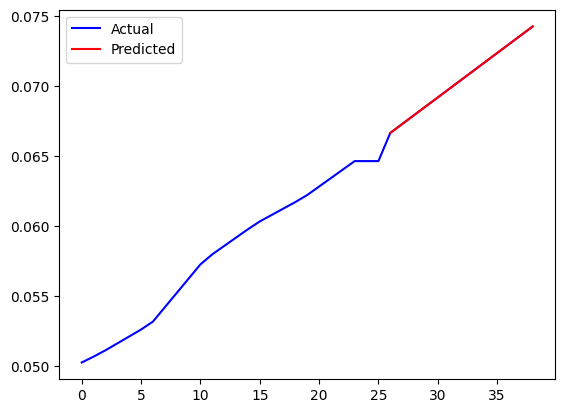

In [ ]:
reg = LinearRegression().fit(x_train, CPI)
print(reg.score(x_train, CPI))
print(reg.coef_)
print(reg.intercept_)

CPI_preds = reg.predict(x_pred)

plt.plot(np.append(CPI, CPI_preds), color="blue")
plt.plot([i for i in range(26, 39)], CPI_preds, color="red")
plt.legend(["Actual","Predicted"])
plt.show()

Doing the same now for Unemployment



0.715577697790023
[-0.00052641]
0.3841067937822096


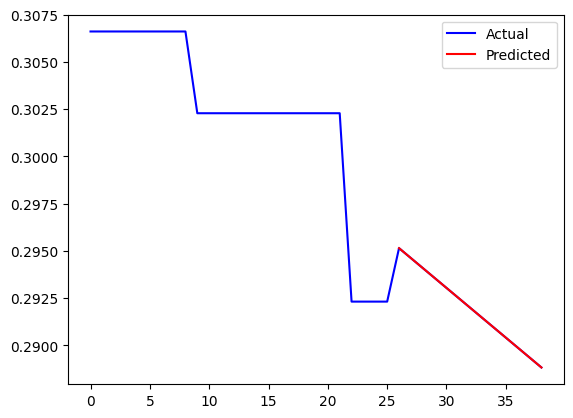

In [ ]:
reg = LinearRegression().fit(x_train, Unemployment)
print(reg.score(x_train, Unemployment))
print(reg.coef_)
print(reg.intercept_)

Unemployment_preds = reg.predict(x_pred)
plt.plot(np.append(Unemployment, Unemployment_preds), color="blue")
plt.plot([i for i in range(26, 39)], Unemployment_preds, color="red")
plt.legend(["Actual","Predicted"])
plt.show()

Predictions inputted into all timestamps from 169 to 181

In [ ]:
for date in range(169, 182):
  for store in range(1, 46):
    for dept in range(0, 81):
      row_index = X_test[(X_test['Store'] == store) &
                        (X_test['Dept'] == dept) &
                        (X_test['Date'] == date)].index
      if not row_index.empty:
        prediction_index = date - 169
        X_test.loc[row_index, 'CPI'] = CPI_preds[prediction_index]
        X_test.loc[row_index, 'Unemployment'] = Unemployment_preds[prediction_index]

Graph with complete CPI and Unemployment forecasts included into the dataframe

<ipython-input-76-2a7091671291>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  CPI = X_test[X_test["Store"]==store][X_test["Dept"]==dept]["CPI"].to_numpy()
<ipython-input-76-2a7091671291>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Unemployment = X_test[X_test["Store"]==store][X_test["Dept"]==dept]["Unemployment"].to_numpy()


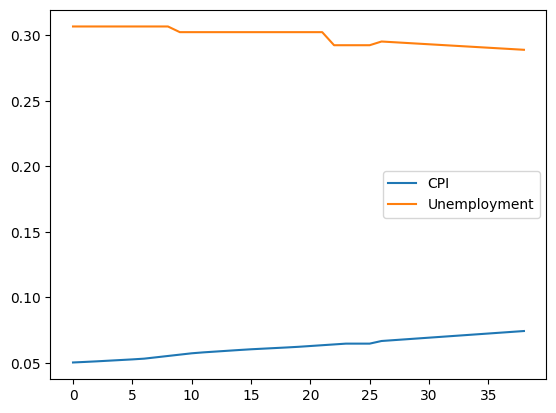

In [ ]:
CPI = X_test[X_test["Store"]==store][X_test["Dept"]==dept]["CPI"].to_numpy()
Unemployment = X_test[X_test["Store"]==store][X_test["Dept"]==dept]["Unemployment"].to_numpy()

plt.plot(CPI)
plt.plot(Unemployment)
plt.legend(["CPI","Unemployment"])
plt.show()

#### CPI and Unemployment Value Predictions Final

In [ ]:
from sklearn.linear_model import LinearRegression

For each store, as the CPI and Unemployment is same for all department, take the first department from timestamp of 143 to 168 as CPI and Unemployment training sequence.

Keep the store individual forecasts in an array.

In [ ]:
CPI_preds_all_stores = []
Unemployment_preds_all_stores = []

for store in range(1,46):

  CPI_preds = []
  Unemployment_preds = []

  train_sequence = X_test[X_test["Store"]==store][X_test["Dept"]==0][X_test["Date"]<169]

  CPI_train = train_sequence["CPI"].to_numpy()
  Unemployment_train = train_sequence["Unemployment"].to_numpy()

  x_train = [[i] for i in range(143,169)]
  x_pred = [[i] for i in range(169,182)]

  reg = LinearRegression().fit(x_train, CPI_train)
  CPI_preds = reg.predict(x_pred)

  reg = LinearRegression().fit(x_train, Unemployment_train)
  Unemployment_preds = reg.predict(x_pred)

  CPI_preds_all_stores.append(CPI_preds)
  Unemployment_preds_all_stores.append(Unemployment_preds)

Forecasts inputted into the dataframe. Store specific inputs.

In [ ]:
for date in range(169, 182):
  for store in range(1, 46):
    for dept in range(0, 81):
      row_index = X_test[(X_test['Store'] == store) &
                        (X_test['Dept'] == dept) &
                        (X_test['Date'] == date)].index
      if not row_index.empty:
        prediction_index = date - 169
        X_test.loc[row_index, 'CPI'] = CPI_preds_all_stores[store-1][prediction_index]
        X_test.loc[row_index, 'Unemployment'] = Unemployment_preds_all_stores[store-1][prediction_index]

Store: 27 and Department 24


<ipython-input-57-3e7f2fce851d>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  CPI_actual = X_test[X_test["Store"]==store][X_test["Dept"]==dept][X_test["Date"]<169]["CPI"].to_numpy()
<ipython-input-57-3e7f2fce851d>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  CPI_actual = X_test[X_test["Store"]==store][X_test["Dept"]==dept][X_test["Date"]<169]["CPI"].to_numpy()
<ipython-input-57-3e7f2fce851d>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  CPI_preds = X_test[X_test["Store"]==store][X_test["Dept"]==dept][X_test["Date"]>=169]["CPI"].to_numpy()
<ipython-input-57-3e7f2fce851d>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  CPI_preds = X_test[X_test["Store"]==store][X_test["Dept"]==dept][X_test["Date"]>=169]["CPI"].to_numpy()


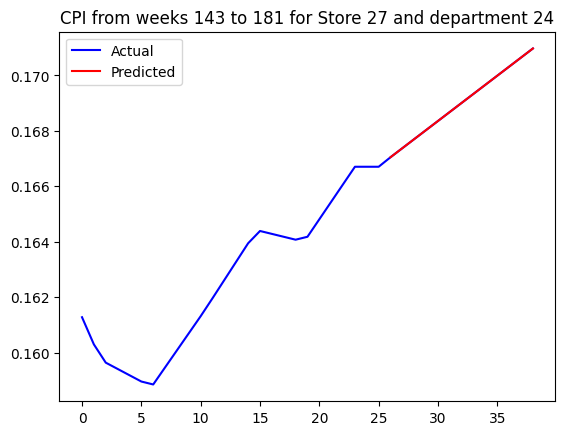

<ipython-input-57-3e7f2fce851d>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Unemployment_actual = X_test[X_test["Store"]==store][X_test["Dept"]==dept][X_test["Date"]<169]["Unemployment"].to_numpy()
<ipython-input-57-3e7f2fce851d>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Unemployment_actual = X_test[X_test["Store"]==store][X_test["Dept"]==dept][X_test["Date"]<169]["Unemployment"].to_numpy()
<ipython-input-57-3e7f2fce851d>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Unemployment_pred = X_test[X_test["Store"]==store][X_test["Dept"]==dept][X_test["Date"]>=169]["Unemployment"].to_numpy()
<ipython-input-57-3e7f2fce851d>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Unemployment_pred = X_test[X_test["Store"]==store][X_test["Dept"]==dept][X_test["Date"]>=169]["Unemployment"].to_numpy()


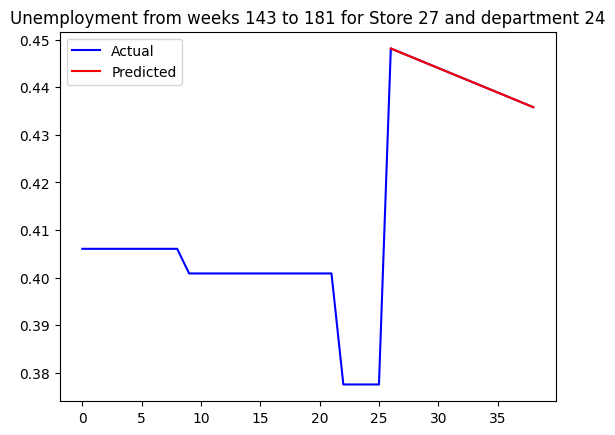

In [ ]:
store = random.randint(1,46)
dept = random.randint(0,81)

print(f"Store: {store} and Department {dept}")

CPI_actual = X_test[X_test["Store"]==store][X_test["Dept"]==dept][X_test["Date"]<169]["CPI"].to_numpy()
CPI_preds = X_test[X_test["Store"]==store][X_test["Dept"]==dept][X_test["Date"]>=169]["CPI"].to_numpy()

plt.plot(np.append(CPI_actual, CPI_preds), color="blue")
plt.plot([i for i in range(26, 39)], CPI_preds, color="red")
plt.title(f"CPI from weeks 143 to 181 for Store {store} and department {dept}")
plt.legend(["Actual","Predicted"])
plt.show()

Unemployment_actual = X_test[X_test["Store"]==store][X_test["Dept"]==dept][X_test["Date"]<169]["Unemployment"].to_numpy()
Unemployment_pred = X_test[X_test["Store"]==store][X_test["Dept"]==dept][X_test["Date"]>=169]["Unemployment"].to_numpy()

plt.plot(np.append(Unemployment_actual, Unemployment_preds), color="blue")
plt.plot([i for i in range(26, 39)], Unemployment_preds, color="red")
plt.title(f"Unemployment from weeks 143 to 181 for Store {store} and department {dept}")
plt.legend(["Actual","Predicted"])
plt.show()

Checking whether there are any missing values -- NO! We have successfully forecasted store individual CPI and Unemployment values and inputted them into the X_test dataframe.

In [ ]:
CPI_na = X_test["CPI"].isna().sum()
Unemployment_na = X_test["Unemployment"].isna().sum()

print(f"CPI missing values: {CPI_na}")
print(f"Unemployment missing values: {Unemployment_na}")

CPI missing values: 0
Unemployment missing values: 0


### Feature Importance

Decided on using RandomForestRegressor sklearn model for Weekly Sales forecasting. We also did feature_importance using this model.

Found that Department and Store to be most important.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

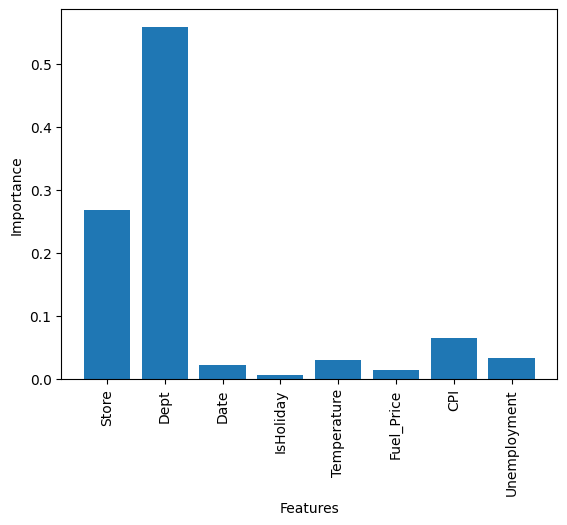

In [ ]:
clf = RandomForestRegressor(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

plt.bar(range(X_train.shape[1]), clf.feature_importances_)
bars = X_train.columns
plt.xticks(range(X_train.shape[1]), bars, rotation=90) #, , rotation=90, fontsize='10', horizontalalignment='right')

plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

### Random Forest Regression

With an R2 value of 99, the model has done really well in modeling the data. However, there is a chance that the model has overfitted to the data.

In [ ]:
score = clf.score(X_train, y_train)
print("R-squared:", score)

R-squared: 0.9934466804081346


In [ ]:
preds = clf.predict(X_test)

We have now appended the Weekly Sales predictions to the X_test data.

With this format, **it is possible to redo the EDA that we did for train datasets and gain even more insights into the future.**

In [ ]:
X_test.insert(3,"Weekly_Sales",preds)
X_test

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment
0,1,0,143,30670.3070,0,0.573142,0.457916,0.946424,0.271804
1,1,0,144,21878.3699,0,0.627334,0.421844,0.946604,0.271804
2,1,0,145,30156.2074,0,0.551172,0.390782,0.946911,0.271804
3,1,0,146,30123.3988,1,0.581472,0.370240,0.947387,0.271804
4,1,0,147,31484.2300,0,0.545862,0.368236,0.947864,0.271804
...,...,...,...,...,...,...,...,...,...
115059,45,79,177,802.4348,0,0.762907,0.584669,0.661924,0.439939
115060,45,79,178,821.9522,0,0.776181,0.572144,0.662517,0.438911
115061,45,79,179,825.1190,0,0.793299,0.572144,0.663111,0.437883
115062,45,79,180,802.7617,0,0.825064,0.633768,0.663704,0.436856


## Forecast Analysis

Graph created from random combination of store and department which shows the weekly sales predictions from 143 to 181 weeks.

42 9


<ipython-input-15-8b2ec450fe20>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filter_data = data[data["Store"]==store][data["Dept"]==dept][data["Date"]>=start][data["Date"]<=end]
<ipython-input-15-8b2ec450fe20>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filter_data = data[data["Store"]==store][data["Dept"]==dept][data["Date"]>=start][data["Date"]<=end]
<ipython-input-15-8b2ec450fe20>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filter_data = data[data["Store"]==store][data["Dept"]==dept][data["Date"]>=start][data["Date"]<=end]


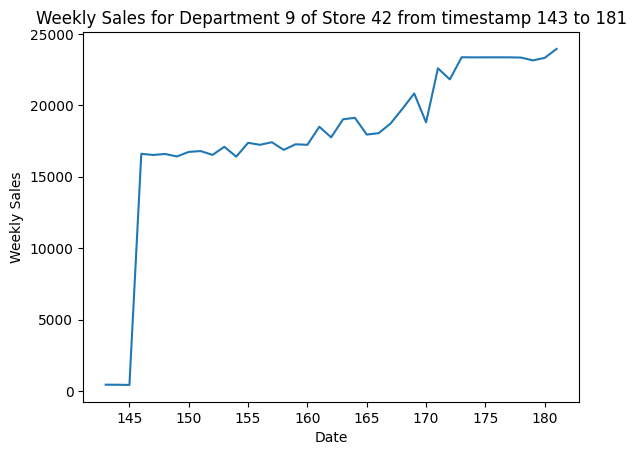

In [ ]:
store = random.randint(1,46)
dept = random.randint(0,81)

print(store,dept)
x=extractData(X_test,store,dept, start=143, end=181)

In [ ]:
allWeeklySales_pred = extractAllWeeklySales(X_test, batch_size=10,start=143, end=181)

Processed stores 1 to 10
Processed stores 11 to 20
Processed stores 21 to 30
Processed stores 31 to 40
Processed stores 41 to 45


In [ ]:
AT_pred = allWeeklySales_pred.T
AT_pred.rename_axis(["Dept","Store"], inplace=True)

We graphed the total weekly sales accross all store and department for our predictions. The trend shows the similar pattern shown in the train datasets.

There is a spike during the Thanksgiving, Christmas and New Years months. Then the weekly sales comes down near 47 million which was the average for training dataset as well.

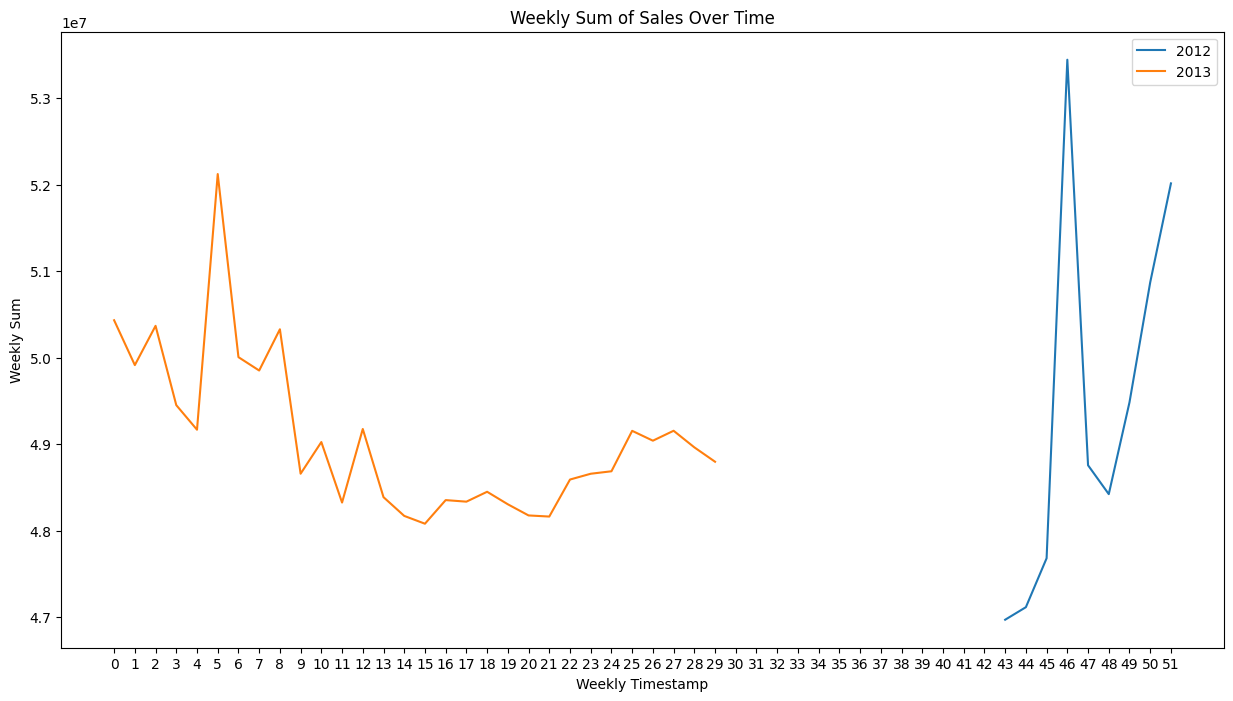

In [ ]:
weekly_sum_pred = [AT_pred[c].sum() for c in AT_pred.columns]

plt.figure(figsize=(15,8))

plt.plot([i for i in range(43,52)], weekly_sum_pred[:9])
plt.plot(weekly_sum_pred[9:])


plt.legend(["2012","2013"])
plt.xticks(np.arange(0, 52, 1))
plt.xlabel("Weekly Timestamp")
plt.ylabel("Weekly Sum")
plt.title("Weekly Sum of Sales Over Time")
plt.show()

Here we have the final graph of total weekly sale sum for predictions overlayed on the training dataset. Here, however, it is shown that the spike in predictions sale during winter months is less in magnitude than the training.

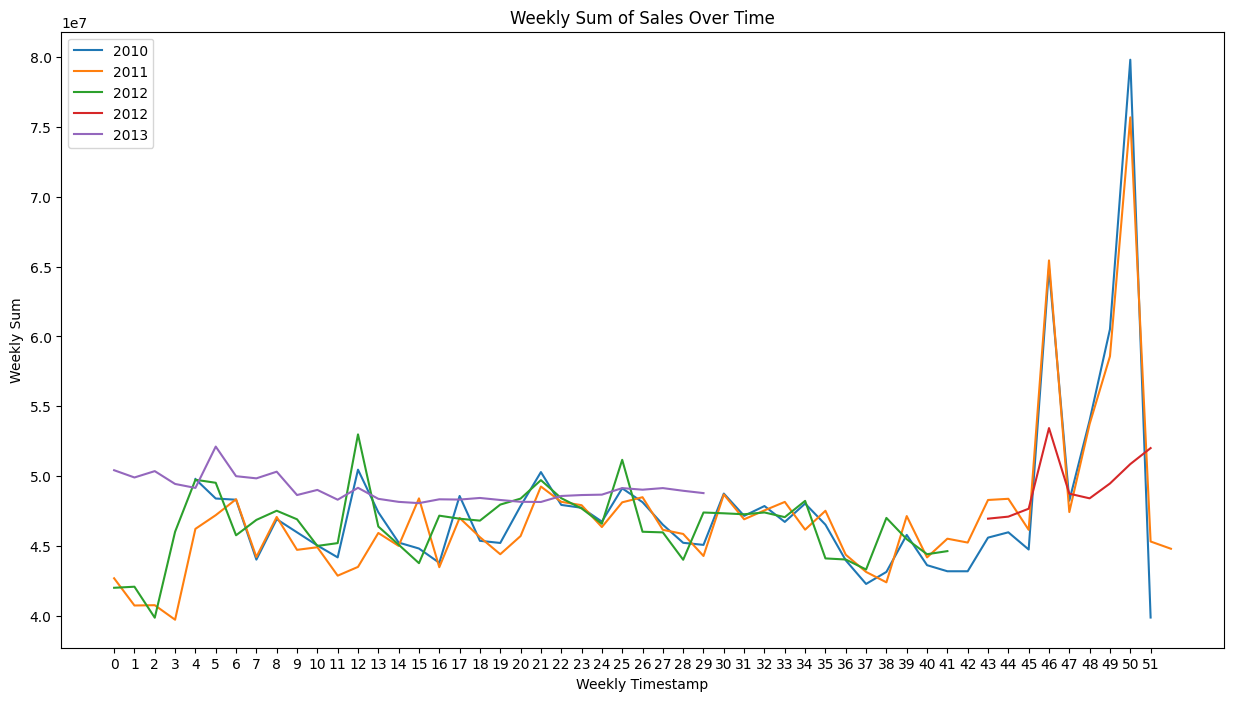

In [ ]:
plt.figure(figsize=(15,8))

plt.plot([i for i in range(4,52)],weekly_sum[0:48])
plt.plot(weekly_sum[48:101])
plt.plot(weekly_sum[101:143])
plt.plot([i for i in range(43,52)], weekly_sum_pred[:9])
plt.plot(weekly_sum_pred[9:])


plt.legend(["2010","2011","2012","2012","2013"])
plt.xticks(np.arange(0, 52, 1))
plt.xlabel("Weekly Timestamp")
plt.ylabel("Weekly Sum")
plt.title("Weekly Sum of Sales Over Time")
plt.show()

# THE END